# Python

## Disclaimer

This lecutre is not a programming lecture. However, for scientific data visualization and analysis, as well as for model development, programming skills are handy. Therefore these lecture notes offer the basics to be able to start using Python and understand how they work. All exercises can be done without writing code, but this lecutre can be used as a chance to start programming.

If you see potential for your future work, there is plenty of material on Python programming in the world wide web. Yet, I would like to point out, that we offer a Python introduction within the lecure [Computer Science (in German)](https://firedynamics.github.io/LectureComputerScience).

Beside this section, which gives an overview of the Python fundamentals, it will be assumed, that the reader is familiar with Python.

## Why Python?

:::{figure-md} fig-python-logo
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Python_logo_and_wordmark.svg" width="60%">

Python logo. Soruce: [Wikkimedia Commons](https://commons.wikimedia.org/wiki/File:Python_logo_and_wordmark.svg).
:::


In contrast to computer programs, Python scripts are not executed, but interpreted by a Python interpreter. This has advantages, like portability, and disadvantages, like potential performance issues.

[Python](https://en.wikipedia.org/wiki/Python_(programming_language)) is widely spread in the scientific and engineering fields because

* it is very simple to learn,
* there exist a huge amount of modules to be easily used,
* it is free, and
* it is OS independent, interpreter are available for most common operating system, including HPC systems.

The Python developers provide guidelines on code structure and readability. Even though they are primarily aimed at code development for Python, it is a good starting point for projects. However, individual projects might have their own guides. 

The reader is specifically directed to [PEP 8 – Style Guide for Python Code](https://peps.python.org/pep-0008/) and [PEP 20 – The Zen of Python](https://peps.python.org/pep-0020/). 

### The Zen of Python

One of the key insights is code is read much more often than it is written, see PEP 8.

* Beautiful is better than ugly.
* Explicit is better than implicit.
* Simple is better than complex.
* Complex is better than complicated.
* Flat is better than nested.
* Sparse is better than dense.
* Readability counts.
* Special cases aren't special enough to break the rules.
* Although practicality beats purity.
* Errors should never pass silently.
* Unless explicitly silenced.
* In the face of ambiguity, refuse the temptation to guess.
* There should be one-- and preferably only one --obvious way to do it.
* Although that way may not be obvious at first unless you're Dutch.
* Now is better than never.
* Although never is often better than *right* now.
* If the implementation is hard to explain, it's a bad idea.
* If the implementation is easy to explain, it may be a good idea.
* Namespaces are one honking great idea -- let's do more of those!

## How to Learn Python 

Some thoughts on learning Python programming, by Guido van Rossum.


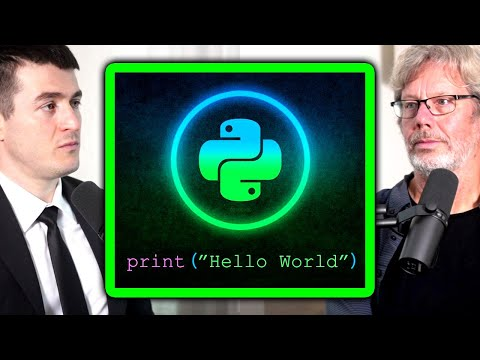

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('F2Mx-u7auUs', width=800, height=400)


## Basics

### Python Interpreter

A Python script is a text file, which can be executed in a shell, by invoking 

```
> python script.py
```

where `script.py` is the path to the script. On some systems, there exist multiple versions of Python. To find out which version of Python is used, the `--version` can be used.

For example:
```
> python --version
Python 2.7.16

> python3 --version
Python 3.8.9
```

In this example, the version 3 of Python needs to be explicitly stated. In general, version 2 of Python should not be used anymore, yet there may exist OS components, which rely on verion 2, thus it is still always available.


### Jupyter

In this lecture, we will use [Jupyter](https://jupyter.org/) as an interactive Python editor. Jupyter notebooks allow to work with so called cells. They may be either Python code, that can be executed cell-wise, or markdown text, to include descriptive information to the script. In contrast to Jupyter, JupyterLab provides a new flexible interface for working with Jupyter notebooks.

JupyterLab 

* runs in a webbrowser,
* integrates an editor, a file browser and a terminal,
* has a modular and flexible interface, and
* provides means for extensions.

Some very basic shortcuts in Jupyter
* start editing cell: `Enter` or `double click`
* execute cell: `Shift-Enter` or `Ctrl-Enter`
* end edit mode of a cell: `Esc`
* add new cells: `a` for a new cell above and `b` for a cell below
* copy / paste / cut cell: `c` / `v` / `x`

### JupyterHub at Pleiades

In the lecutre, we use a [JupyterHub](https://jupyterhub.pleiades.uni-wuppertal.de/) service, which runs on the Pleiades cluster, see the [documentation](https://pleiadesbuw.github.io/PleiadesUserDocumentation/jupyter). This is very convinient, as it allows to directly access the data computed on the cluster. Yet, as this is a system with many users with different requirements, there are only generic configurations for the JupyterLab servers. The individual kernels, i.e. the Python interpreter which are executing the notebook, need to be created within the required environment. The following script outlines one possible way to create specific kernels, which are reasonable for this context. Three steps are needed:

1. Create a Python virtual environment (`venv`)
1. Install all required Python modules into that environment
1. Create a kernel for this environment

All these steps are executed in the following script:

```
#!/bin/bash

# redirect stdout and stderr to console and logfile 
exec &> >(tee logfile)

# load modules
module load 2022a 
module load GCCcore/11.3.0
module load Python/3.10.4-bare
module list

# setup virtual python environment
python3 -m venv venv
source venv/bin/activate

# just output the python setup
which python3
python3 --version

# install all pip packages to venv
pip install -r requirements.txt

# create ipython kernel
python3 -m ipykernel install --user --name 'fire_sim_lecture_2023.05' --display-name "Fire Simulation [May 2023]"

# exit, important for the redirect
exit 0
```

The environment contains the pip modules defined in the `requirements.txt` file:

```
ipykernel
numpy
matplotlib
pandas
scipy
fdsreader
```

### Syntax

The syntax of Python is very simple:

* tokens (variables, operators, etc.) can be separated by multiple spaces, but indentation matters
* one expression per line
* code blocks, e.g. the body of a loop, are indicated by indentation
* there are only a few reserved keywords, e.g. `if`, `for`, `in`, `import`, etc.
* line content after a `#` is interpreted as a comment and thus ignored during execution

Indentation example:

```python
i=5 
b=i*3
for it in range (10): 
    print(it)
    if it < 5:
        print("too small") 
        do_something(it)
        b = b + it**2
print(b)
```

Here, there exist three level of indentation, which are indicated as a sequance of four spaces. An alternative to spaces is the usage of tabs.

### Operators

Some of the main operators used in Python:

* value assignment: =
* comparison operators: >, <=, ==
* arithmetic operators: e.g. +, *, **, %
* logical operators and values: and, or, not, True, False

Expressions can be grouped with brackets `()` to adopt the order of execution.

In [1]:
# Operator examples
5 + 7

12

In [2]:
(10 + 4) ** 2

196

In [3]:
12 > 24

False

In [4]:
(2 ** 3) > (10 - 7)

True

### Variables

Variables are used to store values, which can be referenced or changed during execution. In contrast to many other programming languages, variables do not need an explicit type declaration.

To assign a value to a variable, the assignment operator `=` is used. The general form is given by

```python
variable_name = value
```

Where the variable name must not be an intrinsic keyword, start with a number or contain spaces. To read the value of a variable, its name must just be placed at the according position.

In [6]:
# Variable assignment examples
result = 5

12 * result

60

In [7]:
new_result = result ** 2

result > new_result

False

There are a few basic data types in Python:

* integers: `1`, `3`, `5`, `-78`
* floats: `3.142`, `42.1`, `1e-7`
* strings: `"Wuppertal"`, `'fire'`
* lists: `[7, 3, 6.7, 'computer']`


### Functions

Functions allow to encapsulate frequent and common tasks. The are called by their name, followed by `()`, that may contain function arguments, separated by a `,`. An optional return value may be passed by a function.

The general form is

```python
return_value = function_name(argument_1, argument_2, ...)
```

There are only few [build-in functions in Python](https://docs.python.org/3/library/functions.html). In general, additional functions are loaded via modules.

In [8]:
### Function examples
# print function: Prints the argument's value. Jupyter automaticaly prints the 
# result of the last expression in a cell. This is not true for Python scripts 
# directly executed.

print(result)
print(new_result)

5
25


In [11]:
a = 5
print('a =', a)

b = a ** 5
print('b = a**2 =', b)

a = 5
b = a**2 = 3125


In [14]:
# min / max functions: return the maximal value of the passed arguments

res = max(a, b, 1000)
print('Maximal value:', res )

res = min(a, b, 1000)
print('Minimal value:', res )

Maximal value: 3125
Minimal value: 5


## Lists

A list is a ordered set of values. Each element can be of every possible type, including an other list. To define a list, square brackets `[]` are used:

```python
list_name = [e1, e2, e3]
```

In [15]:
# List creation example
results = [22.4, -30.7, 16.3, -0.34]

print('List of results:', results)

List of results: [22.4, -30.7, 16.3, -0.34]


In [16]:
### Append element to a list example
# To append an element, use the function list.append

results.append(0.5)
results.append(112.4)

print('List of results:', results)

List of results: [22.4, -30.7, 16.3, -0.34, 0.5, 112.4]


It is possible to access individual elements of a list, either for reading or changing its value. To do so, the element is addressed by its index, which starts at zero. The syntax for this is `list[index]`. To reference the elements starting at the last one, negative indices are used. Here the last element has the index -1.

In [19]:
# Access list elements example

print('First element :', results[0])
print('Third element :', results[2])
print('Last element  :', results[-1])

First element : 22.4
Third element : 16.3
Last element  : 112.4


In [20]:
# Modification of a list element

print('Third element before modification :', results[2])
results[2] = 55.5
print('Third element after modification  :', results[2])

print('Full list :', results)

Third element before modification : 16.3
Third element after modification  : 55.5
Full list : [22.4, -30.7, 55.5, -0.34, 0.5, 112.4]


## Strings

Strings are sets of characters to represent text or numbers in a human readable sense. They can be explicitly definded with `''` or `""`. 

```python
string_name = "This is a short text."
```

Strings can be added to create a new string with the merged contents of the operands.

In [24]:
# Merge of strings example
chair = 'Computational Civil Engineering'
university = 'University of Wuppertal'

combined = chair + ", " + university
print(combined)

Computational Civil Engineering, University of Wuppertal


To incorporate variable values into strings, formatted strings (f-strings) can be used. They allow to reference variable values and control their string representation. The placeholder is defined with `{variable_name}` and the f-string is declared with `f''` or `f""`.

In [26]:
# f-string example
year = 2019
established = f'established in {year}'

combined = chair + ", " + university + ", " + established
print(combined)

# or 

combined = f'{chair}, {university}, established in {year}'
print(combined)

Computational Civil Engineering, University of Wuppertal, established in 2019
Computational Civil Engineering, University of Wuppertal, established in 2019


## Flow Control

There exist two main structures, which are common in many programming languages and allow to build a complex execution flow.

* **Loops** repeat a set of expressions (loop body) for a given loop variable. The value of the loop variable iterates throug a list of values.

* **Branching** allows to execute expressions depending on a condition. 

### Loops

The basic structure of a loop is

```python
# loop header
for loop_variable in loop_values:
    # loop body
    loop_body()
```

Here, the name of the loop variable can be freely chosen and the loop body may consist of any number of expressions. The syntax for a loop definition includes the keywords `for` and `in`, while the header is closed with a `:`. An alternative way to express loops is with the `while` keyword. The loop body is intended by one level (e.g. 4 spaces or a single tab).

In [27]:
# Loop example 1

for i in [4,7,2,9]:
    print(i, i**2)

4 16
7 49
2 4
9 81


In [29]:
# Loop example 2

for j in range(10):
    print(j, j*10)

0 0
1 10
2 20
3 30
4 40
5 50
6 60
7 70
8 80
9 90


The build-in function [`range()`](https://docs.python.org/3/library/functions.html#func-range) is often used in the context of loops to generate a structured sequence of values to be looped over. It can take up to three arguments (start, stop, step) to control the created sequance.

In [30]:
# Range example

for k in range(10, 30, 2):
    print(k)

10
12
14
16
18
20
22
24
26
28


### Branching

In order to control the execution flow, branching or if-statements are used. An if-statement uses the `if` and optionally the `else` keywords, closes its definition with a `:` and takes the follwoing general form

```python
if conditon:
    # if-true body
    if_true_body()
else:
    # if-false body
    if_false_body
```

In the above structure, the `condition` is evaluated. If it evaluates to true (`True`) then the first code block (intended by one level) is exectued. If there is an else block defined, it is executed if `condition` evaluates to false (`False`).

In [31]:
# Branching example 1

a = 5
b = 12

if a > b:
    print(f"{a} is greater than {b}")
else:
    print(f"{a} is less than {b}")

5 is less than 12


In [32]:
# Branching example 2

for i in range(10):
    if i % 2 == 0:
        print(f"The number {i} is even.")
    else:
        print(f"The number {i} is odd.")

The number 0 is even.
The number 1 is odd.
The number 2 is even.
The number 3 is odd.
The number 4 is even.
The number 5 is odd.
The number 6 is even.
The number 7 is odd.
The number 8 is even.
The number 9 is odd.


## Modules

In this lecture, we will use a couple of modules, which implement a lot of functionality, like numerical scheme, data input and output as well as data visualisation.

To make the content of a module available in a script, it needs to be imported:

```python
import module_name as short_name
```

The `import` keyword is followed by the module name (`module_name`) and optionaly the reference to the module can be renamed with the `as` keywort to a short name (`short_name`).

The contents, e.g. variables and functions, are accessed as 

```python
module_name.function()
```

In [33]:
import numpy as np
print( np.pi )
print( np.sin(np.pi / 2) )

3.141592653589793
1.0


**numpy & scipy**

The module [`numpy`](https://numpy.org) provides data structures (arrays) for fast operations. Additionaly, there is a wide range of mathematical functions and methods available.

While `numpy` is rather focussed on the basic numerical structure, the [`scipy`](https://www.scipy.org) module implements many advanced mathematical and analysis methods.

**matplotlib**

A common choise for data visualisation is the module [`matplotlib`](https://matplotlib.org). It offers many ways to graphicaly present data, see [gallery](https://matplotlib.org/stable/gallery/index.html).

**fdsreader**

The [`fdsreader`](https://github.com/FireDynamics/fdsreader) module is developed by us and provides an infrastructure to read simulation data generated with FDS.